# Programa de optimización de carga

## BIBLIOTECAS

In [1]:
# Definimos las bibliotecas que vamos a utilizar.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyomo.environ as pyo
import pyomo.gdp as gdp
import random as rnd
import datetime as dt
import matplotlib as mpl
from datetime import datetime
import seaborn as sns

In [2]:
basepath= "C:/Users/dsepu/JupyterLab"

## CONSUMO ELÉCTRICO RESIDENCIAL

In [3]:
# Display the residential electrical consumption
df_consumo = pd.read_csv(basepath + '/MEDIDAS_PRMTE_202207_15MIN_CURICO.csv', sep = ';', names = ['AÑO', 'MES', 'DIA', 'HORA UTC', 'HORA', 'INICIO INTERVALO',
       'FIN INTERVALO', 'PUNTO DE MEDIDA', 'COORDINADO', 'SERIE MEDIDOR',
       'SUBESTACION', 'FECHA DE ULTIMA LECTURA', 'PRINCIPAL/RESPALDO',
       'ID Bitacora/F-Inicio_F-fin', 'Retiro_Energia_Activa',
       'Retiro_Energia_Reactiva', 'Inyección_Energia_Activa',
       'Inyección_Energia_Reactiva'], skiprows=1)
df_consumo

,AÑO,MES,DIA,HORA UTC,HORA,INICIO INTERVALO,FIN INTERVALO,PUNTO DE MEDIDA,COORDINADO,SERIE MEDIDOR,SUBESTACION,FECHA DE ULTIMA LECTURA,PRINCIPAL/RESPALDO,ID Bitacora/F-Inicio_F-fin,Retiro_Energia_Activa,Retiro_Energia_Reactiva,Inyección_Energia_Activa,Inyección_Energia_Reactiva
0,2022,7,1,4,0,0,15,CURICO_013_CT3_CEC,CEC,MW1601A78202_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,00","0,00","0,00","0,00"
1,2022,7,1,4,0,15,30,CURICO_013_CT3_CEC,CEC,MW1601A78202_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,00","0,00","0,00","0,00"
2,2022,7,1,4,0,30,45,CURICO_013_CT3_CEC,CEC,MW1601A78202_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,00","0,00","0,00","0,00"
3,2022,7,1,4,0,45,60,CURICO_013_CT3_CEC,CEC,MW1601A78202_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,00","0,00","0,00","0,00"
4,2022,7,1,5,1,0,15,CURICO_013_CT3_CEC,CEC,MW1601A78202_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,00","0,00","0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142843,2022,7,31,2,22,45,60,CURICO_013_PMGD3_SES,PMGD SAN EMILIO SOLAR I,MR2101B81302_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,66","0,09","0,00","0,00"
142844,2022,7,31,3,23,0,15,CURICO_013_PMGD3_SES,PMGD SAN EMILIO SOLAR I,MR2101B81302_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,67","0,11","0,00","0,00"
142845,2022,7,31,3,23,15,30,CURICO_013_PMGD3_SES,PMGD SAN EMILIO SOLAR I,MR2101B81302_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,67","0,10","0,00","0,00"
142846,2022,7,31,3,23,30,45,CURICO_013_PMGD3_SES,PMGD SAN EMILIO SOLAR I,MR2101B81302_0100,CURICO,31-07-2022 23:45,PRINCIPAL,NaN,"0,67","0,11","0,00","0,00"


In [4]:
# Transformation of consumption values to float and filter.
df_consumo = df_consumo[['AÑO', 'MES', 'DIA', 'HORA', 'INICIO INTERVALO', 'FIN INTERVALO', 'PUNTO DE MEDIDA','Retiro_Energia_Activa']]
df_consumo['Retiro_Energia_Activa']=df_consumo['Retiro_Energia_Activa'].str.replace('.','')
df_consumo['Retiro_Energia_Activa']=df_consumo['Retiro_Energia_Activa'].str.replace(',','.').astype(float)
df_consumo

C:\Users\dsepu\AppData\Local\Temp\ipykernel_4504\2660966491.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_consumo['Retiro_Energia_Activa']=df_consumo['Retiro_Energia_Activa'].str.replace('.','')
C:\Users\dsepu\AppData\Local\Temp\ipykernel_4504\2660966491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consumo['Retiro_Energia_Activa']=df_consumo['Retiro_Energia_Activa'].str.replace('.','')
C:\Users\dsepu\AppData\Local\Temp\ipykernel_4504\2660966491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,AÑO,MES,DIA,HORA,INICIO INTERVALO,FIN INTERVALO,PUNTO DE MEDIDA,Retiro_Energia_Activa
0,2022,7,1,0,0,15,CURICO_013_CT3_CEC,0.00
1,2022,7,1,0,15,30,CURICO_013_CT3_CEC,0.00
2,2022,7,1,0,30,45,CURICO_013_CT3_CEC,0.00
3,2022,7,1,0,45,60,CURICO_013_CT3_CEC,0.00
4,2022,7,1,1,0,15,CURICO_013_CT3_CEC,0.00
...,...,...,...,...,...,...,...,...
142843,2022,7,31,22,45,60,CURICO_013_PMGD3_SES,0.66
142844,2022,7,31,23,0,15,CURICO_013_PMGD3_SES,0.67
142845,2022,7,31,23,15,30,CURICO_013_PMGD3_SES,0.67
142846,2022,7,31,23,30,45,CURICO_013_PMGD3_SES,0.67


In [5]:
# Create a function to datetime format
def to_daytime(r):
    anho = r['AÑO']
    mes = r['MES']
    dia = r['DIA']
    hora =r['HORA']
    minuto = r['INICIO INTERVALO']
    return datetime(year = int(anho), month=mes, day=dia, hour = hora, minute = minuto)

In [6]:
# New column with data in datetiem format.
fechas = df_consumo[['AÑO', 'MES', 'DIA', 'HORA', 'INICIO INTERVALO']]
df_consumo['FECHA'] = df_consumo.apply(lambda x: to_daytime(x), axis=1).to_list()
df_consumo

C:\Users\dsepu\AppData\Local\Temp\ipykernel_4504\2360446735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consumo['FECHA'] = df_consumo.apply(lambda x: to_daytime(x), axis=1).to_list()


,AÑO,MES,DIA,HORA,INICIO INTERVALO,FIN INTERVALO,PUNTO DE MEDIDA,Retiro_Energia_Activa,FECHA
0,2022,7,1,0,0,15,CURICO_013_CT3_CEC,0.00,2022-07-01 00:00:00
1,2022,7,1,0,15,30,CURICO_013_CT3_CEC,0.00,2022-07-01 00:15:00
2,2022,7,1,0,30,45,CURICO_013_CT3_CEC,0.00,2022-07-01 00:30:00
3,2022,7,1,0,45,60,CURICO_013_CT3_CEC,0.00,2022-07-01 00:45:00
4,2022,7,1,1,0,15,CURICO_013_CT3_CEC,0.00,2022-07-01 01:00:00
...,...,...,...,...,...,...,...,...,...
142843,2022,7,31,22,45,60,CURICO_013_PMGD3_SES,0.66,2022-07-31 22:45:00
142844,2022,7,31,23,0,15,CURICO_013_PMGD3_SES,0.67,2022-07-31 23:00:00
142845,2022,7,31,23,15,30,CURICO_013_PMGD3_SES,0.67,2022-07-31 23:15:00
142846,2022,7,31,23,30,45,CURICO_013_PMGD3_SES,0.67,2022-07-31 23:30:00


In [7]:
# Select all data <1500 kWh
df_potencia = df_consumo[['FECHA', 'PUNTO DE MEDIDA', 'Retiro_Energia_Activa']]
# to_ignore = ['FATIMA_154_AT3_TRS',
#               'FATIMA_154_A1_TRS',
#               'FATIMA_015_CT1_TRS',
#               'FATIMA_066_B6_TRS',
#               'FATIMA_015_CT2_TRS',
#              'FATIMA_154_AT3_TRS',
#             'FATIMA_154_A2_TRS',
#              'FATIMA_015_PMGD4_PHS']
# df_poten = df_potencia[~df_potencia['PUNTO DE MEDIDA'].isin(to_ignore)]
# df_poten

In [8]:
to_ignore = df_potencia.groupby('PUNTO DE MEDIDA',as_index=False).mean()
to_ignore

,PUNTO DE MEDIDA,Retiro_Energia_Activa
0,CURICO_013_CT3_CEC,0.005477
1,CURICO_013_CT4_CEC,1625.554110
2,CURICO_013_LBR10_CEC,62.083498
3,CURICO_013_LBR11_CEC,48.345024
4,CURICO_013_LBR12_CEC,24.061613
5,CURICO_013_LBR13_CEC,48.761989
6,CURICO_013_LBR14_CEC,176.534459
7,CURICO_013_LBR15_CGD,9.623884
8,CURICO_013_LBR16_CEC,65.887984
9,CURICO_013_LBR17_CEC,15.331317


In [9]:
# List of users
bigger_that = to_ignore[to_ignore['Retiro_Energia_Activa']<1500]
users = bigger_that['PUNTO DE MEDIDA'].tolist()
# users = df_poten['PUNTO DE MEDIDA'].unique()
print(users)
# bigger_that

['CURICO_013_CT3_CEC', 'CURICO_013_LBR10_CEC', 'CURICO_013_LBR11_CEC', 'CURICO_013_LBR12_CEC', 'CURICO_013_LBR13_CEC', 'CURICO_013_LBR14_CEC', 'CURICO_013_LBR15_CGD', 'CURICO_013_LBR16_CEC', 'CURICO_013_LBR17_CEC', 'CURICO_013_LBR18_CEC', 'CURICO_013_LBR19_TRS', 'CURICO_013_LBR1_CEC', 'CURICO_013_LBR20_TRS', 'CURICO_013_LBR21_TRS', 'CURICO_013_LBR22_TRS', 'CURICO_013_LBR23_CEC', 'CURICO_013_LBR24_TRS', 'CURICO_013_LBR25_TRS', 'CURICO_013_LBR26_TRS', 'CURICO_013_LBR27_TRS', 'CURICO_013_LBR28_TRS', 'CURICO_013_LBR29_TRS', 'CURICO_013_LBR2_CEC', 'CURICO_013_LBR30_TRS', 'CURICO_013_LBR31_TRS', 'CURICO_013_LBR32_TRS', 'CURICO_013_LBR33_TRS', 'CURICO_013_LBR34_TRS', 'CURICO_013_LBR35_TRS', 'CURICO_013_LBR36_TRS', 'CURICO_013_LBR37_TRS', 'CURICO_013_LBR38_TRS', 'CURICO_013_LBR3_CEC', 'CURICO_013_LBR4_TCR', 'CURICO_013_LBR5_TCR', 'CURICO_013_LBR6_TCR', 'CURICO_013_LBR7_TCR', 'CURICO_013_LBR9_CEC', 'CURICO_013_PMGD1_TNE', 'CURICO_013_PMGD2_GZA', 'CURICO_013_PMGD3_SES', 'CURICO_015_C11_TRS', 'CU

In [10]:
# Select an amount of users randomly
# np.random.seed(2) # testeo
num_users = np.random.randint(1,len(users))
users_random = np.random.choice(users, num_users)
users_random

array(['CURICO_013_LBR35_TRS', 'CURICO_013_LBR2_CEC',
       'CURICO_013_LBR25_TRS'], dtype='<U20')

In [11]:
# Filter of the data with the users selected
from random import randint
df_poten = df_potencia[df_potencia['PUNTO DE MEDIDA'].isin(users_random)]
df_poten

,FECHA,PUNTO DE MEDIDA,Retiro_Energia_Activa
29760,2022-07-01 00:00:00,CURICO_013_LBR2_CEC,69.70
29761,2022-07-01 00:15:00,CURICO_013_LBR2_CEC,67.47
29762,2022-07-01 00:30:00,CURICO_013_LBR2_CEC,73.87
29763,2022-07-01 00:45:00,CURICO_013_LBR2_CEC,72.07
29764,2022-07-01 01:00:00,CURICO_013_LBR2_CEC,78.54
...,...,...,...
130939,2022-07-31 22:45:00,CURICO_013_LBR35_TRS,16.33
130940,2022-07-31 23:00:00,CURICO_013_LBR35_TRS,16.28
130941,2022-07-31 23:15:00,CURICO_013_LBR35_TRS,16.25
130942,2022-07-31 23:30:00,CURICO_013_LBR35_TRS,16.30


In [12]:
# Totallize of consumption by 'Fecha'
df_poten.groupby('FECHA').sum().max()

Retiro_Energia_Activa    339.13
dtype: float64

In [13]:
df_poten.groupby('PUNTO DE MEDIDA').sum()

,Retiro_Energia_Activa
PUNTO DE MEDIDA,
CURICO_013_LBR25_TRS,354206.22
CURICO_013_LBR2_CEC,168019.45
CURICO_013_LBR35_TRS,60205.32


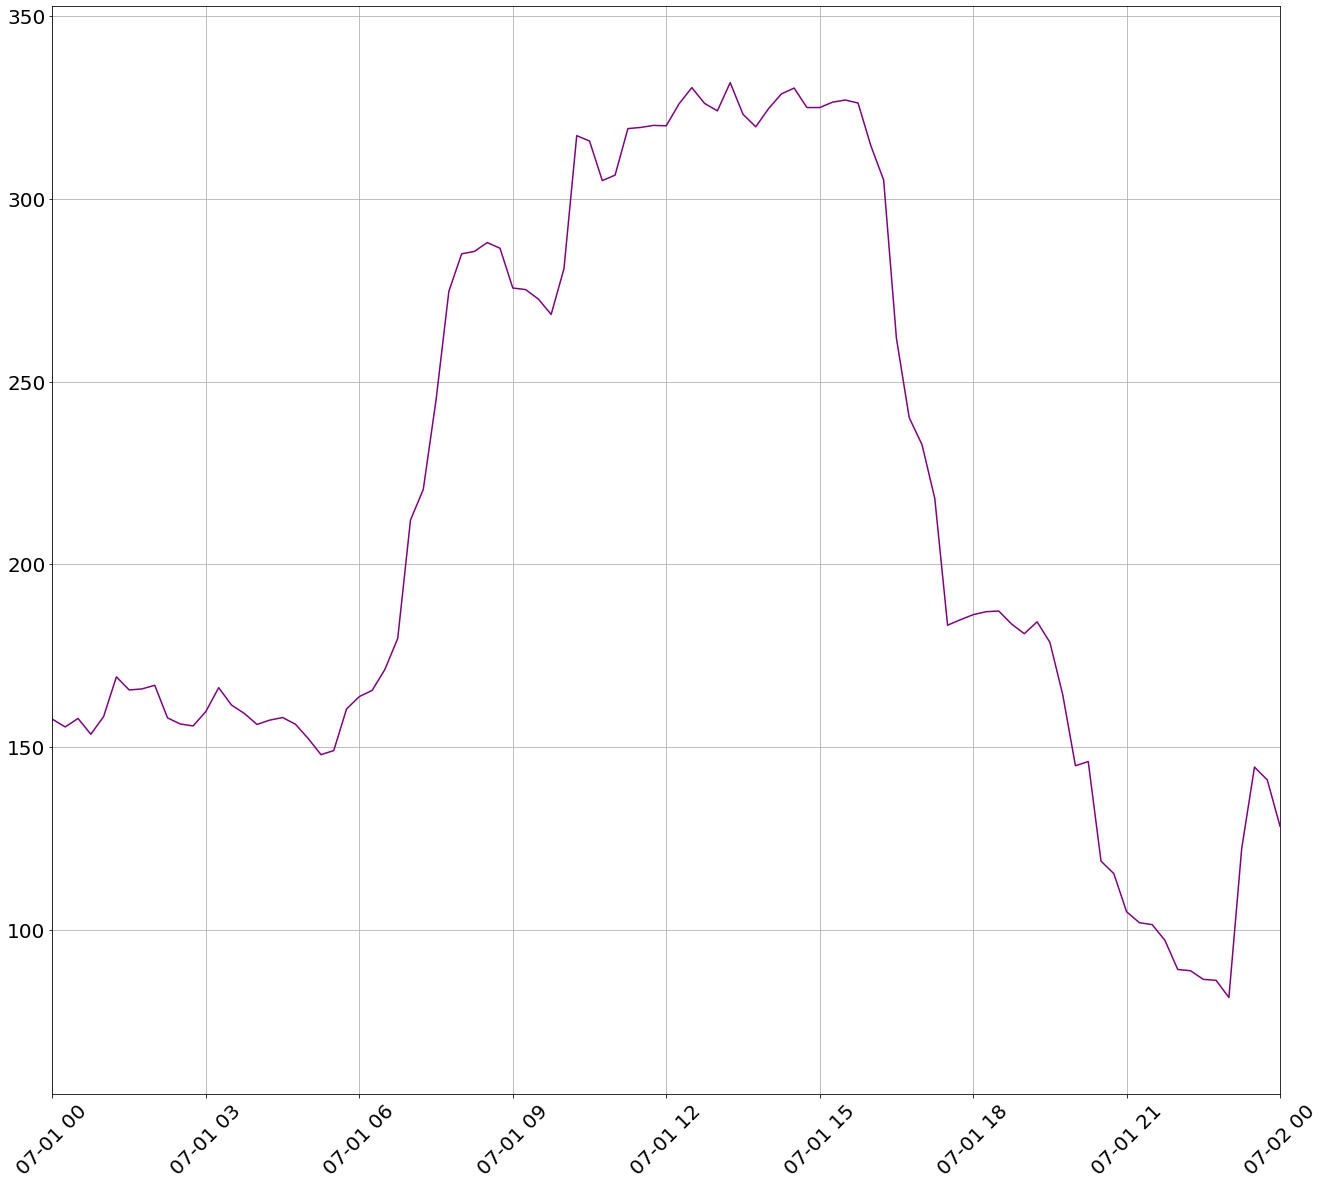

In [14]:
plt.figure(figsize=(22,20))
params = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
mpl.rcParams.update(params)
plt.plot(df_poten.groupby('FECHA').sum(), color='purple')
plt.grid()
plt.xlim(datetime(2022,7,1), datetime(2022,7,2))
plt.xticks(rotation=45)
plt.show()

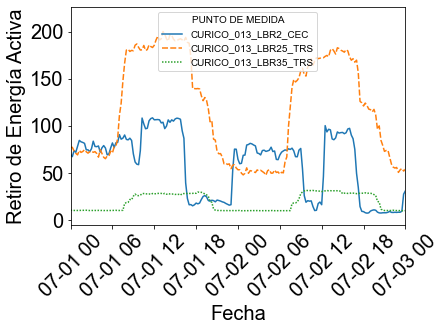

In [15]:
sns.lineplot(data=df_poten, x="FECHA", y="Retiro_Energia_Activa", hue="PUNTO DE MEDIDA",style="PUNTO DE MEDIDA")
sns.set(rc = {'figure.figsize':(50,40)})
params = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
mpl.rcParams.update(params)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Retiro de Energía Activa', fontsize=20)
plt.xlim(dt.datetime(2022,7,1), datetime(2022,7,3))
plt.xticks(rotation=45)
plt.show()

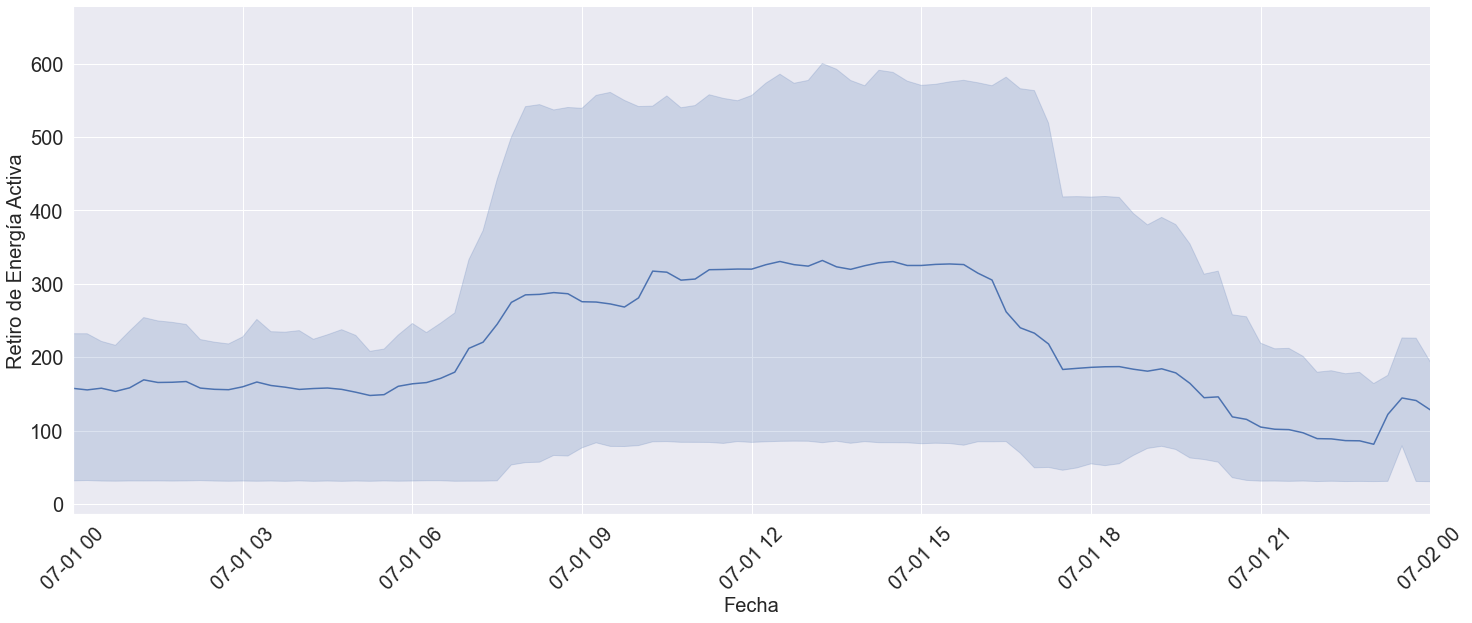

In [16]:
sns.relplot(data=df_poten, kind="line", x="FECHA", y="Retiro_Energia_Activa", estimator= sum, height=8, aspect=2.5)
sns.set(rc = {'figure.figsize':(20,10)})
params = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
mpl.rcParams.update(params)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Retiro de Energía Activa', fontsize=20)
plt.xlim(dt.datetime(2022,7,1), datetime(2022,7,2))
plt.xticks(rotation=45)
plt.show()

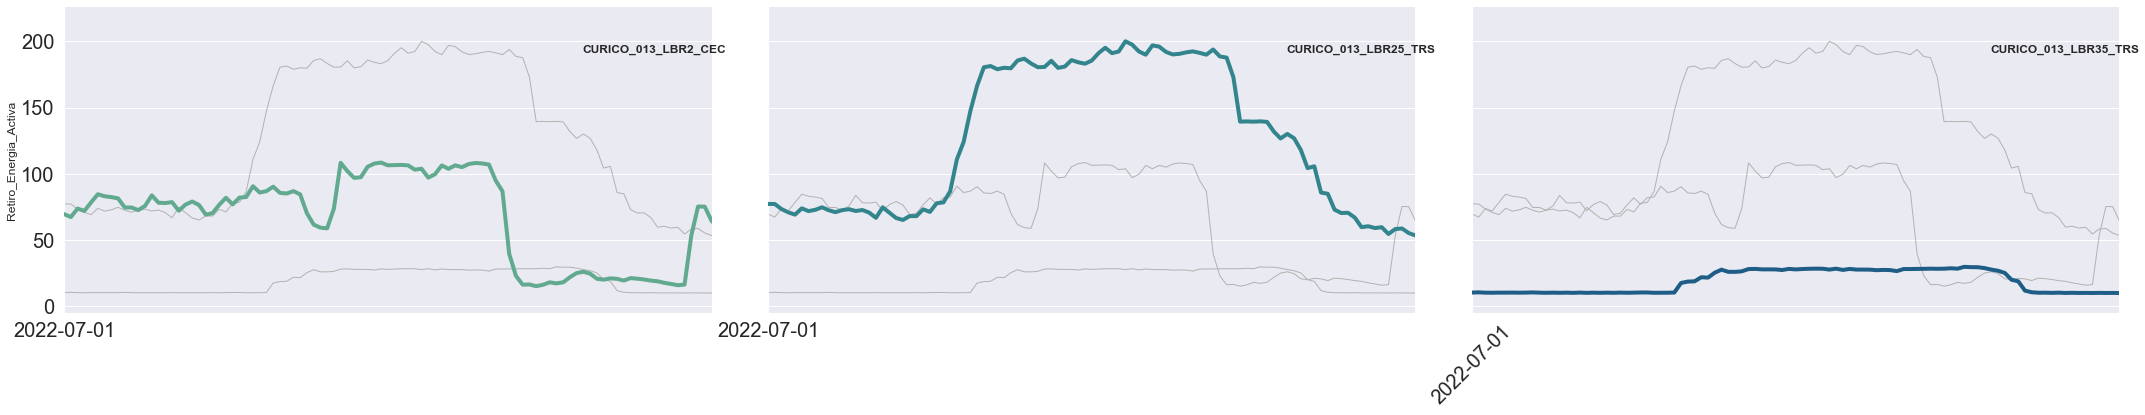

In [17]:
# Multiples gráficos, destacando el usuario correspondiente.

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_poten,
    x="FECHA", y="Retiro_Energia_Activa", col="PUNTO DE MEDIDA", hue="PUNTO DE MEDIDA",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=5, aspect=2, legend=False,
)


# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_poten, x="FECHA", y="Retiro_Energia_Activa", units="PUNTO DE MEDIDA",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )


# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Retiro_Energia_Activa")
g.tight_layout()
plt.xlim(datetime(2022,7,1), datetime(2022,7,2))
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='FECHA', ylabel='Retiro_Energia_Activa'>

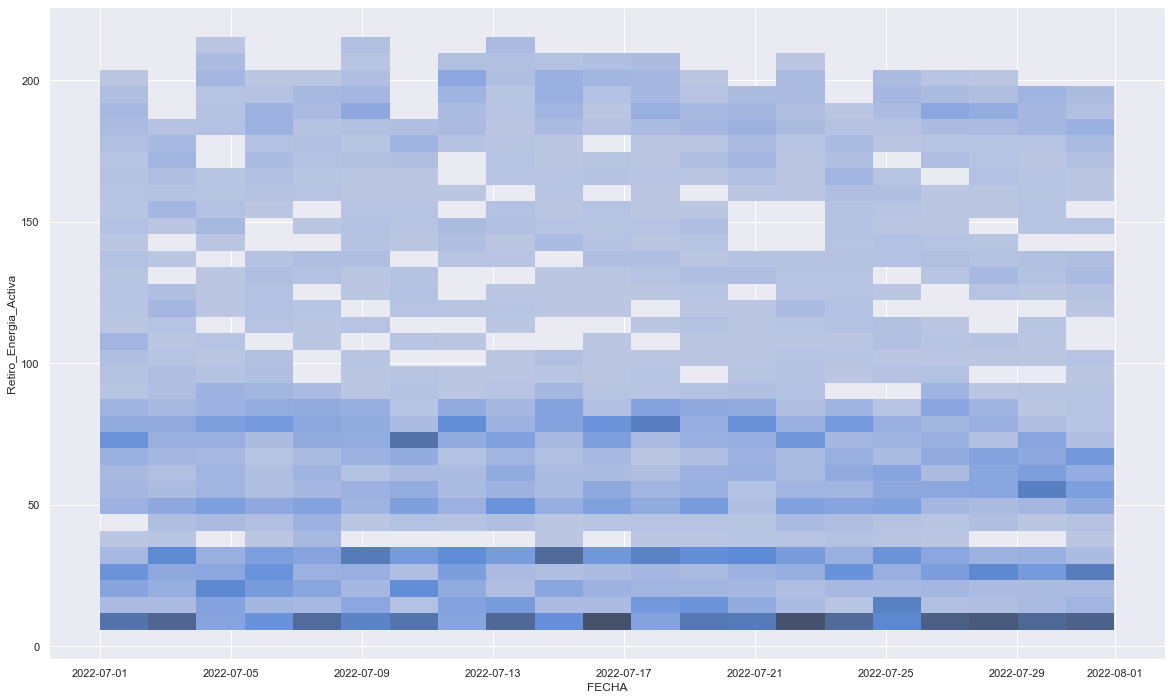

In [18]:
sns.set(rc = {'figure.figsize':(20,12)})
sns.histplot(data=df_poten, x = 'FECHA', y = 'Retiro_Energia_Activa')

In [19]:
df_g1=df_poten[df_poten['Retiro_Energia_Activa']<=100]
df_g1

,FECHA,PUNTO DE MEDIDA,Retiro_Energia_Activa
29760,2022-07-01 00:00:00,CURICO_013_LBR2_CEC,69.70
29761,2022-07-01 00:15:00,CURICO_013_LBR2_CEC,67.47
29762,2022-07-01 00:30:00,CURICO_013_LBR2_CEC,73.87
29763,2022-07-01 00:45:00,CURICO_013_LBR2_CEC,72.07
29764,2022-07-01 01:00:00,CURICO_013_LBR2_CEC,78.54
...,...,...,...
130939,2022-07-31 22:45:00,CURICO_013_LBR35_TRS,16.33
130940,2022-07-31 23:00:00,CURICO_013_LBR35_TRS,16.28
130941,2022-07-31 23:15:00,CURICO_013_LBR35_TRS,16.25
130942,2022-07-31 23:30:00,CURICO_013_LBR35_TRS,16.30


In [20]:
df_g2 = df_poten[(df_poten['Retiro_Energia_Activa']>100) & (df_poten['Retiro_Energia_Activa']<=220)]
df_g2

,FECHA,PUNTO DE MEDIDA,Retiro_Energia_Activa
29801,2022-07-01 10:15:00,CURICO_013_LBR2_CEC,108.37
29802,2022-07-01 10:30:00,CURICO_013_LBR2_CEC,102.15
29805,2022-07-01 11:15:00,CURICO_013_LBR2_CEC,105.40
29806,2022-07-01 11:30:00,CURICO_013_LBR2_CEC,107.81
29807,2022-07-01 11:45:00,CURICO_013_LBR2_CEC,108.58
...,...,...,...
101164,2022-07-31 19:00:00,CURICO_013_LBR25_TRS,124.84
101165,2022-07-31 19:15:00,CURICO_013_LBR25_TRS,126.09
101166,2022-07-31 19:30:00,CURICO_013_LBR25_TRS,126.93
101167,2022-07-31 19:45:00,CURICO_013_LBR25_TRS,126.18


In [21]:
df_g3 = df_poten[(df_poten['Retiro_Energia_Activa']>220) & (df_poten['Retiro_Energia_Activa']<=500)]
df_g3

,FECHA,PUNTO DE MEDIDA,Retiro_Energia_Activa


In [22]:
df_g4 = df_poten[(df_poten['Retiro_Energia_Activa']>500) & (df_poten['Retiro_Energia_Activa']<=1000)]
df_g4


,FECHA,PUNTO DE MEDIDA,Retiro_Energia_Activa


In [23]:
df_g5 = df_poten[df_poten['Retiro_Energia_Activa']>1000]
df_g5

,FECHA,PUNTO DE MEDIDA,Retiro_Energia_Activa


## CONSUMO VE

### Data de VEs

In [24]:
ve_features = {'Tipo':['Leaf VE', 'Bolt VE', 'Zoe VE', 'Model 3 VE', 'i3s EREV', 'Prius PHVE', 'Fusion PHVE', 'Cayenne PHVE', 'i8 PHVE', 'XC-90 PHVE'],
               'Capacidad de Bateria (kWh)': [40,60,41,62,42.2,8.8,7,14.1,11.7,10.4],
               'Corriente Max (A)': [32, 32,32,32,32,16,16,32,16,16],
              'Autonomia (km)':[240, 380.8, 232, 422.4, 201.6, 40, 41.6, 30.4, 43.2, 22.4],
              'Consumo (kWh/km)': [0.188, 0.175, 0.163, 0.169, 0.2, 0.156, 0.206, 0.394, 0.216, 0.356]}
df_features_ve= pd.DataFrame(ve_features)
# df_features_ve.set_index('Tipo', inplace=True)
df_features_ve

,Tipo,Capacidad de Bateria (kWh),Corriente Max (A),Autonomia (km),Consumo (kWh/km)
0,Leaf VE,40.0,32,240.0,0.188
1,Bolt VE,60.0,32,380.8,0.175
2,Zoe VE,41.0,32,232.0,0.163
3,Model 3 VE,62.0,32,422.4,0.169
4,i3s EREV,42.2,32,201.6,0.200
5,Prius PHVE,8.8,16,40.0,0.156
6,Fusion PHVE,7.0,16,41.6,0.206
7,Cayenne PHVE,14.1,32,30.4,0.394
8,i8 PHVE,11.7,16,43.2,0.216
9,XC-90 PHVE,10.4,16,22.4,0.356


### PDF de Frecuencia de Viaje

In [25]:
schedulling = {'PDF (%)': [60.45, 11.89, 13.73, 13.93], 'CDF (%)': [60.45, 72.34, 86.07, 100]}
df_rutina = pd.DataFrame(schedulling, index= ['Todos los días','3 a 4 dias', '1 a 2 dias', 'Raramente o nunca'])
df_rutina

,PDF (%),CDF (%)
Todos los días,60.45,60.45
3 a 4 dias,11.89,72.34
1 a 2 dias,13.73,86.07
Raramente o nunca,13.93,100.00


### Distancia Recorrida Promedio por Motivo de viaje

In [26]:
trip_reason = {'Razon': ['Trabajo', 'Compras', 'Estudios', 'Atencion de salud', 'Otros'],
              'PDF (%)': [56.69, 14.54, 10.3, 9.55, 8.92],
               'CDF (%)': [56.69, 71.23, 81.53, 91.08, 100],
              'Distancia promedio (km)': [26.6, 16.8, 19.0, 22.8, 16.8],
              'Duracion promedio (min)': [37.7, 31.1, 33.4, 38.7, 31.1]}
df_motivo_viaje = pd.DataFrame(trip_reason)
df_motivo_viaje.set_index('Razon', inplace=True)
df_motivo_viaje

,PDF (%),CDF (%),Distancia promedio (km),Duracion promedio (min)
Razon,,,,
Trabajo,56.69,56.69,26.6,37.7
Compras,14.54,71.23,16.8,31.1
Estudios,10.30,81.53,19.0,33.4
Atencion de salud,9.55,91.08,22.8,38.7
Otros,8.92,100.00,16.8,31.1


### Estado de Carga (SoC)

Estado de Batería 

\begin{equation}
    SoC_n = 1 - \frac{c_n \cdot d_n \cdot f}{B_n}, n = 1,...,N
\end{equation}

In [27]:
# Seleccionar cantidad de vehículos "conectado"

N = rnd.randint(0,51) # Cantidad de vehículos conectados, (0,50)
rand_ve= df_features_ve.sample(N+1, replace=True)
cap_ve = rand_ve.iloc[:,[0,1,2,4]]
cap_ve

,Tipo,Capacidad de Bateria (kWh),Corriente Max (A),Consumo (kWh/km)
3,Model 3 VE,62.0,32,0.169
5,Prius PHVE,8.8,16,0.156
6,Fusion PHVE,7.0,16,0.206
9,XC-90 PHVE,10.4,16,0.356
4,i3s EREV,42.2,32,0.200
9,XC-90 PHVE,10.4,16,0.356
2,Zoe VE,41.0,32,0.163
5,Prius PHVE,8.8,16,0.156
8,i8 PHVE,11.7,16,0.216
1,Bolt VE,60.0,32,0.175


In [28]:
## Genera un caso de rutina de viaje del usuario

rand_rutina = []
dias_rutinas = []
for i in range(N+1):
    i_rut = np.random.uniform(0.,100.0)
    if  i_rut<= 60.45:
        rand_rutina.append('Todos los dias')
        dias_rutinas.append(5)
    elif 60.45 < i_rut <= 72.34 :
        rand_rutina.append('3 a 4 dias')
        dias_rutinas.append(np.random.randint(3,5))
    elif 72.34 < i_rut <= 86.07:
        rand_rutina.append('1 a 2 dias')
        dias_rutinas.append(np.random.randint(1,3))
    elif 86.07 < i_rut <= 100:
        rand_rutina.append('Raramente o nunca')
        dias_rutinas.append(np.random.randint(0,1))
count_rutina= dict(zip(rand_rutina,map(lambda x: rand_rutina.count(x),rand_rutina)))
count_rutina
cap_ve['Dias']= dias_rutinas
cap_ve

,Tipo,Capacidad de Bateria (kWh),Corriente Max (A),Consumo (kWh/km),Dias
3,Model 3 VE,62.0,32,0.169,5
5,Prius PHVE,8.8,16,0.156,0
6,Fusion PHVE,7.0,16,0.206,5
9,XC-90 PHVE,10.4,16,0.356,5
4,i3s EREV,42.2,32,0.200,5
9,XC-90 PHVE,10.4,16,0.356,5
2,Zoe VE,41.0,32,0.163,5
5,Prius PHVE,8.8,16,0.156,1
8,i8 PHVE,11.7,16,0.216,0
1,Bolt VE,60.0,32,0.175,4


In [29]:
len(cap_ve['Dias'].values)

16

In [30]:
# Genera un motivo relacionado a los viajes efectuados

rand_motivo = []
meter_ve = []
time_ve = []
for ve in cap_ve['Dias']:
    motivo_diario = 0.
    tiempo_carga = 0.
    for dia in range(ve):
        i_mot=np.random.uniform(0.,100.0)
        if  i_mot<= 56.69:
            rand_motivo.append('Trabajo')
            motivo_diario += df_motivo_viaje['Distancia promedio (km)'].loc['Trabajo']
            tiempo_carga += df_motivo_viaje['Duracion promedio (min)'].loc['Trabajo']
        elif 56.69 < i_mot <= 71.23:
            rand_motivo.append('Compras')
            motivo_diario += df_motivo_viaje['Distancia promedio (km)'].loc['Compras']
            tiempo_carga += df_motivo_viaje['Duracion promedio (min)'].loc['Compras']
        elif 71.23 < i_mot <= 81.53:
            rand_motivo.append('Estudios')
            motivo_diario += df_motivo_viaje['Distancia promedio (km)'].loc['Estudios']
            tiempo_carga += df_motivo_viaje['Duracion promedio (min)'].loc['Estudios']
        elif 81.53 < i_mot <= 91.08:
            rand_motivo.append('Atencion de Salud')
            motivo_diario += df_motivo_viaje['Distancia promedio (km)'].loc['Atencion de salud']
            tiempo_carga += df_motivo_viaje['Duracion promedio (min)'].loc['Atencion de salud']
        elif 91.08 < i_mot <= 100:
            rand_motivo.append('Otros')
            motivo_diario += df_motivo_viaje['Distancia promedio (km)'].loc['Otros']
            tiempo_carga += df_motivo_viaje['Duracion promedio (min)'].loc['Otros']
    meter_ve.append(motivo_diario)
    time_ve.append(tiempo_carga)
count_motivo= dict(zip(rand_motivo,map(lambda x: rand_motivo.count(x),rand_motivo)))
cap_ve['DISTANCIA RECORRIDA']= meter_ve
cap_ve['TIEMPO DE CARGA'] = time_ve
cap_ve

,Tipo,Capacidad de Bateria (kWh),Corriente Max (A),Consumo (kWh/km),Dias,DISTANCIA RECORRIDA,TIEMPO DE CARGA
3,Model 3 VE,62.0,32,0.169,5,113.4,175.3
5,Prius PHVE,8.8,16,0.156,0,0.0,0.0
6,Fusion PHVE,7.0,16,0.206,5,123.2,181.9
9,XC-90 PHVE,10.4,16,0.356,5,115.6,177.6
4,i3s EREV,42.2,32,0.200,5,125.4,184.2
9,XC-90 PHVE,10.4,16,0.356,5,119.4,182.9
2,Zoe VE,41.0,32,0.163,5,103.6,168.7
5,Prius PHVE,8.8,16,0.156,1,16.8,31.1
8,i8 PHVE,11.7,16,0.216,0,0.0,0.0
1,Bolt VE,60.0,32,0.175,4,106.4,150.8


In [31]:
cap_ve['SoC'] = 1 - cap_ve['DISTANCIA RECORRIDA'] * cap_ve['Dias'] * cap_ve['Consumo (kWh/km)']/cap_ve['Capacidad de Bateria (kWh)']
cap_ve

,Tipo,Capacidad de Bateria (kWh),Corriente Max (A),Consumo (kWh/km),Dias,DISTANCIA RECORRIDA,TIEMPO DE CARGA,SoC
3,Model 3 VE,62.0,32,0.169,5,113.4,175.3,-0.545532
5,Prius PHVE,8.8,16,0.156,0,0.0,0.0,1.000000
6,Fusion PHVE,7.0,16,0.206,5,123.2,181.9,-17.128000
9,XC-90 PHVE,10.4,16,0.356,5,115.6,177.6,-18.785385
4,i3s EREV,42.2,32,0.200,5,125.4,184.2,-1.971564
9,XC-90 PHVE,10.4,16,0.356,5,119.4,182.9,-19.435769
2,Zoe VE,41.0,32,0.163,5,103.6,168.7,-1.059366
5,Prius PHVE,8.8,16,0.156,1,16.8,31.1,0.702182
8,i8 PHVE,11.7,16,0.216,0,0.0,0.0,1.000000
1,Bolt VE,60.0,32,0.175,4,106.4,150.8,-0.241333


### Horarios de llegada y salida

In [32]:
plugin_time = {'Horarios': ['5 a 7hrs', '7 a 9 hrs', '9 a 11 hrs', '11 a 13 hrs', '13 a 15 hrs', '15 a 17 hrs',
                          '17 a 19 hrs', '19 a 21 hrs', '21 a 23hrs', '23 a 5hrs'],
              'Trabajo': [34.02, 47.82, 8.22, 8.22, 10.12, 14.22, 30.12, 11.92, 5.22,2.82],
              'Tratamiento de Salud': [16.07, 45.47, 25.77, 10.07, 17.67, 17.47, 14.97, 4.87, 2.67, 1.77],
              'Estudios': [16.57, 17.27, 7.97, 13.27, 9.27, 8.57, 36.57, 17.97, 23.97, 8.97],
              'Otros': [17.55, 37.05, 22.25, 10.15, 14.05, 14.55, 21.95, 6.65, 1.15, 3.05]}
pd.DataFrame(plugin_time)

,Horarios,Trabajo,Tratamiento de Salud,Estudios,Otros
0,5 a 7hrs,34.02,16.07,16.57,17.55
1,7 a 9 hrs,47.82,45.47,17.27,37.05
2,9 a 11 hrs,8.22,25.77,7.97,22.25
3,11 a 13 hrs,8.22,10.07,13.27,10.15
4,13 a 15 hrs,10.12,17.67,9.27,14.05
5,15 a 17 hrs,14.22,17.47,8.57,14.55
6,17 a 19 hrs,30.12,14.97,36.57,21.95
7,19 a 21 hrs,11.92,4.87,17.97,6.65
8,21 a 23hrs,5.22,2.67,23.97,1.15
9,23 a 5hrs,2.82,1.77,8.97,3.05


In [33]:
#Averiguar cuál es el motivo de hacer esto

for group_key, group_value in df_poten.groupby('PUNTO DE MEDIDA'):
    print(group_value)
    print(group_key)

                     FECHA       PUNTO DE MEDIDA  Retiro_Energia_Activa
98208  2022-07-01 00:00:00  CURICO_013_LBR25_TRS                  77.34
98209  2022-07-01 00:15:00  CURICO_013_LBR25_TRS                  77.32
98210  2022-07-01 00:30:00  CURICO_013_LBR25_TRS                  73.48
98211  2022-07-01 00:45:00  CURICO_013_LBR25_TRS                  71.02
98212  2022-07-01 01:00:00  CURICO_013_LBR25_TRS                  69.29
...                    ...                   ...                    ...
101179 2022-07-31 22:45:00  CURICO_013_LBR25_TRS                  62.48
101180 2022-07-31 23:00:00  CURICO_013_LBR25_TRS                  54.79
101181 2022-07-31 23:15:00  CURICO_013_LBR25_TRS                  56.28
101182 2022-07-31 23:30:00  CURICO_013_LBR25_TRS                  57.30
101183 2022-07-31 23:45:00  CURICO_013_LBR25_TRS                  53.92

[2976 rows x 3 columns]
CURICO_013_LBR25_TRS
                    FECHA      PUNTO DE MEDIDA  Retiro_Energia_Activa
29760 2022-07-01 00:

### Tiempos de Desconexión/Conexión

In [96]:
# Datos VIAJES

df_viaje= pd.read_excel(basepath + '/Viaje.xlsx').fillna(0)

# Encuestados Motorizados-Particular

viajes_motor = df_viaje[(df_viaje['ModoMotor']==1) & (df_viaje['ModoPriPub']==1)]
viajes_motor = viajes_motor[['Hogar', 'Persona', 'Viaje', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'ModoPriPub', 'ModoMotor', 'HoraIni', 'HoraFin',
        'TiempoViaje', 'Periodo', 'CuadrasDespues', 'CódigoTiempo']]

In [106]:
# Datos ETAPA

df_etapa= pd.read_excel(basepath + '/Etapa.xlsx')

# Filtrado de encuestados que se desplazan en auto y son choferes

personas_chof = df_etapa[df_etapa['Modo']==1]

# Lista de automovilistas choferes

lista_personas_chof = personas_chof['Persona'].unique().tolist()

In [134]:
# Encuestados choferes de autos particulares

chof_motor_part = viajes_motor.loc[viajes_motor['Persona'].isin(lista_personas_chof)]

# FILTRADO de Tiempos de viaje

# Tiempo distinto de 0
time_bigger_than_0 = chof_motor_part[chof_motor_part['TiempoViaje']!=0]
time_bigger_than_0.to_excel('test.xlsx')


In [137]:
time_bigger_than_0['Persona'].value_counts()

15659101    14
10089001    14
19118301    12
19350101    12
19063101    11
            ..
12913001     1
10755102     1
19493301     1
19498101     1
13468101     1
Name: Persona, Length: 3618, dtype: int64

In [133]:
time_bigger_than_0.columns

Index(['Hogar', 'Persona', 'Viaje', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'ModoPriPub',
       'ModoMotor', 'HoraIni', 'HoraFin', 'TiempoViaje', 'Periodo',
       'CuadrasDespues', 'CódigoTiempo'],
      dtype='object')

In [110]:
# Hogares de Persona filtradas

hogares_filtrados = time_bigger_than_0['Hogar'].unique().tolist()

In [108]:
# Datos HOGAR

df_plug_in= pd.read_excel(basepath + '/Hogar.xlsx')
df_plug_in[['Hogar', 'Sector', 'Zona', 'Comuna', 'DirCoordX', 'DirCoordY', 'Fecha',
       'DiaAsig', 'TipoDia', 'Temporada', 'NumPer', 'NumVeh', 'Propiedad']]

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,NumPer,NumVeh,Propiedad
0,100010,7,786,BUIN,335180.801930,6.266421e+06,2013-04-14,domingo,2,1,3,1,2
1,100020,7,785,BUIN,338410.211368,6.265607e+06,2013-04-10,miércoles,1,1,5,1,1
2,100030,7,791,BUIN,327863.824769,6.257800e+06,2013-08-23,viernes,1,1,1,0,3
3,100041,7,791,BUIN,327864.000000,6.257800e+06,2013-08-23,viernes,1,1,5,0,1
4,100052,7,783,BUIN,338480.815238,6.267297e+06,2013-08-08,jueves,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,7,785,BUIN,339104.101119,6.263064e+06,2013-11-24,domingo,2,1,5,0,1
18260,706781,2,69,CERRO NAVIA,338539.174137,6.299539e+06,2013-11-24,domingo,2,1,6,0,1
18261,706791,2,69,CERRO NAVIA,338563.220058,6.299580e+06,2013-11-24,domingo,2,1,2,0,1
18262,743813,5,244,LA GRANJA,349410.281183,6.289669e+06,2013-11-24,domingo,2,1,2,0,1


In [112]:
df_plug_in.loc[df_plug_in['Hogar'].isin(hogares_filtrados)]

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumVeh,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,Factor
1,100020,7,785,BUIN,338410.211368,6.265607e+06,2013-04-10,miércoles,1,1,...,1,3,0,1,NaN,0,120000,0,1019369,73.843597
6,100070,7,783,BUIN,338672.275377,6.267349e+06,2013-04-08,lunes,1,1,...,1,0,0,1,NaN,0,90000,0,231227,98.045624
13,100170,7,783,BUIN,338672.089371,6.266596e+06,2013-02-20,miércoles,1,2,...,3,2,1,3,NaN,0,150000,0,1200000,270.516083
21,100262,7,786,BUIN,337881.553922,6.266178e+06,2013-02-23,sábado,2,2,...,1,0,0,1,NaN,0,260000,0,1586807,116.353302
25,100302,7,786,BUIN,335115.442909,6.266057e+06,2013-04-13,sábado,2,1,...,1,2,1,5,NaN,0,200000,0,526495,93.285820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,202651,6,487,PEÑALOLEN,353220.644654,6.292392e+06,2012-08-10,viernes,1,1,...,1,1,0,1,NaN,0,180000,0,787467,82.113853
10201,202751,6,493,PEÑALOLEN,358500.647717,6.292325e+06,2013-06-07,viernes,1,1,...,3,1,0,1,NaN,0,250000,0,1644773,193.302765
10202,202761,6,493,PEÑALOLEN,358500.647717,6.292325e+06,2013-06-07,viernes,1,1,...,3,1,1,1,NaN,0,200000,0,1349678,172.699142
10207,202811,6,491,PEÑALOLEN,357772.256190,6.294269e+06,2012-11-23,viernes,1,1,...,1,0,0,1,NaN,0,230000,0,871497,162.441666


ValueError: Could not interpret value `FECHA` for parameter `x`

## Cuerpo del Programa

El programa busca optimizar las tasas de carga, sin exceder las limitaciones de potencia del trafo.

El problema es modelado en función de una cantidad N total de VEs conectados, entre los que se coordina la carga de cada uno para estar en la condiciones requeridas por el usuario al momento de la salida.
Éste es abordado por ventanas de tiempo, de modo que el período total disponible **H** para la recarga durante el día, es distribuido uniformemente en un intervalo amuestral ($T_a$) dentro de **J** intervalos.

$N$: Total de VEs

$n$: Número del VE

$H$: Período total disponible

$T_a$: Intervalo amuestral en que se divide H


$J = \frac{H}{T_a}$

Se presenta una variable auxiliar que registra el estado de **_cada cargador_**, si es que está conectado (True) o no (False). Para definir el tiempo conectado se regitran los instantes de conexión ($k^c_n$) y desconexión($k^p_n$).

$\alpha^j_n$: Indica el estatus de conectado/disponible del cargador

$k^c_n$: Instante de conexión

$k^p_n$: Instante de desconexión

\begin{equation}
\alpha^j_n = \left\{
	  \begin{array}{ll}
		 1 & \forall j \in [k^c_n,k^p_n] \\
		 0 & \forall j \in [1,J]-[k^c_n,k^p_n] \\
	  \end{array}
    \right.
\end{equation}






Además del estado de conexión de cada cargador, el mecanismo de adquisición de datos debe almacenar la potencia máxima admisible de carga para cada VE conectado ($P^{C,max}_n$). De acuerdo a esto encontramos dos limitaciones: la primera la infraestructura que puede presentar un menor nivel de carga respecto a la capacidad del VE, o bien el VE presenta una limitante de potencia requerida.

Así, se define una **tasa de carga** ($C^j_n$) del VE n en el instante j, acorde a las condiciones de la máxima carga admisible registrada al momento de conexión del VE, es decir, cuando $\alpha^j_n = 1$.

En definitiva, el problema de optimización busca **_maximizar la tasa de carga_** a cada instante de tiempo, respetando las limitaciones impuestas por la potencia máxima de cada VE y por la potencia del transformador.

$P^{C,max}_n$: Potencia máxima admisible

$C^j_n$: Tasa de carga

\begin{equation}C^j_n \leq \alpha^j_n \end{equation}

## Priorización de Carga


Para satisfacer los requerimientos de recarga para cada VE se priorizan aquellos que tienen mayor necesidad de energía y menor tiempo de conexión. Para esto se define una varible que permite definir un **_peso de prioridad_** ($\rho^{C,j}_n$) para cada vehículo conectado, considerando la capacidad de carga y el tiempo restante del VE conectado al cargador $n$ en el instante $j$.

Considerando el SoC actual ($S^j_n$), la capacidad de carga es dada en función de la cantidad de Soc necesario para satisfacer el SoC deseado por el usuario ($S^f_n$), además de la capacidad de batería ($B_n$) y la potencia máxima admisible ($P^{C,max}_n$).

El tiempo restante ($R^j_n$) se obtiene de diferencia entre el horario de salida ($k^p_n$) y el instante de tiempo actual (j).



$\rho^{C,j}_n$: Prioridad de carga, considerando la capacidad de carga
 
$S^j_n$: SoC actual

$S^f_n$: SoC deseado por el cliente
 
$B_n$: Capacidad de la batería

$P^{C,max}_n$: Potencia máxima admisible por el VE

$R^j_n$: Tiempo restante

$j$: Instante de tiempo actual

\begin{equation}
\rho^j_n = \left\{
	  \begin{array}{ll}
		 \frac{B_n(S^f_n - S^j_n)}{P^{C,max}_n \cdot R^j_n} & \mathrm{si\ } \alpha^j_n = 1 \\
		 0 & \mathrm{si\ } \alpha^j_n = 0 \\
	  \end{array}
    \right.
\end{equation}

\begin{equation} R^j_n = k^p_n - j \end{equation}

## Preferencia del precio


Otra variable influyente en el programa de optimización es el aspecto económico. Se define una variable auxiliar $\tau^{C,j}_n$ cuyo valor está en función de la tarifa actual. El uso de esta variable es poder designar el instante de carga de menor costo para el usuario.

$\tau^{C,max}_n$: Parámetro auxiliar para cuantificar nivel de preferencia para carga

$T_{max}$: Tarifa máxima

$T_{min}$: Tarifa mínima

$T^j$: Tarifa actual

\begin{equation}
\tau^{C,max}_n = \left\{
	  \begin{array}{ll}
		 \frac{T_{max}-T^j}{T_{max}-T_{min}} & \mathrm{si\ } \alpha^j_n = 1 \\
		 0 & \mathrm{si\ } \alpha^j_n = 0 \\
	  \end{array}
    \right.
\end{equation}

## Preferencia por la Demanda del transformador

Para este se define una variable auxiliar ($D^{C,j}_n$) que está en función de la demanda típica del transformador de distribución, con el que se busca que se efectúe la carga en los períodos de menor demanda de las unidades consumidoras.

Esta variable no considera la demanda de los VEs, sino sólo las unidades consumidoras.

$D^{C,j}_n$: parámetro auxiliar de preferencia para carga en función del transformador

$D_{max}$: Demanda máxima

$D_{min}$: Demanda mínima

\begin{equation}
D^{C,j}_n = \left\{
	  \begin{array}{ll}
		 \frac{D_{max}-D^j}{D_{max}-D_{min}} & \mathrm{si\ } \alpha^j_n = 1 \\
		 0 & \mathrm{si\ } \alpha^j_n = 0 \\
	  \end{array}
    \right.
\end{equation}


## Función objetivo

Debido a que la función objetivo es de maximización, el mayor resultado de la multiplicación entre estos coeficientes determinará **cuándo el VE carga su batería**, así como define la **tasa de carga impuesta a cada VE**, respetando las restricciones del problema de optimización, como se indica a continuación. 

\begin{equation} max \phi^k = \sum^J_{j=k}[\sum^N_{n=1}(C^j_n \cdot P^{C,max}_n \cdot \rho^{C,j}_n \cdot \tau^{C,j}_n \cdot D^{C,j}_n)] \end{equation}

## Restricciones

### Limite de potencia del transformador

Es un instrumento de prevención a las sobrecargas. Este expresa que entre la demanda base y la suma de las demanda de VEs no debe ser superior a la potencia máxima que permite el transformador.

Esta restricción puede ser fija o variable en el tiempo dependiendo de la estructura tarifaria.

$P^{max,j}_{trafo}$: Potencia máxima solicitada al trafo

$Db^j_n$: Demanda base

$(C^j_n \cdot P^{C,max}_n)$: Sumatoria de la demanda de los VEs

\begin{equation}
    Db^j_n + \sum^N_{n=1} (C^j_n \cdot P^{C,max}_n) \leq P^{max,j}_{trafo}, j=k,...,J
\end{equation}

### Potencia de los VEs

Durante el proceso de carga, la potencia de carga debe fluctuar entre valores que no sobrepasen la potencia máxima admisible por cada VE.

\begin{equation}C^j_n \cdot P^{C,max}_n \leq P^{C,max}_n, n = 1,...,N, j = k^c_n,...,k^p_n \end{equation}

### SoC de los VEs

Uno de los datos que se debe recopilar desde la base de control es el SoC inicia ($S^i_n$), obtenido al momento de conexión del VE ($k^c_n$).

$S^i_n$: SoC inicial

$S^j_n$: SoC actual

\begin{equation}S^j_n = S^i_n, \mathrm{si\ } j=k^c_n, n = 1,...,N \end{equation}

El SoC actual se puede definir en función del SoC de tiempo anterior y el incremento de SoC como resultado de la carga.

$\eta$: Eficiencia de carga

$B_n$: Capacidad de la batería(kWh)

$T_a$: Tiempo atemporal (horas)

\begin{equation}S^j_n = S^{j-1} + \frac{\eta \cdot P^{C,max}_n \cdot C^j_n \cdot T_a}{B_n}, n=1,...,N, j = k^c_n,...,k^p_n \end{equation}

El estado de bateria debe ser restringido a sus extremos para disminuir el desgate temprano de éste.

$S^{max}_n$: SoC superior

$S^{min}_n$: SoC inferior

\begin{equation} S^{min}_n \leq S^{j-1}_n + \frac{\eta \cdot P^{C,max}_n \cdot C^j_n \cdot T_a}{B_n} \leq S^{max}_n \end{equation}

La recarga del VE debe requerir un valor mínimo determinado por el usuario al momento de su próximo viaje. Este se puede entregar al momento de conexión, junto con el horario de salida.

$S^p_n$: Soc mínimo de partida

\begin{equation}S^{j-1}_n = \sum^{k^p_n}_{j=k}(\frac{\eta \cdot P^{C,max}_n \cdot C^j_n \cdot T_a}{B_n}) \geq S^p_n, n = 1,...,N \end{equation}

# Programación

## Constantes

In [50]:
# Definimos los parámetros.

In [ ]:
N = 50                         #Total de VEs
n = np.random(1,N)             #Número del VE
H =                            #Período total disponible, depende del patrón de movilidad
t_muestral =                   #Intervalo amuestral en que se divide H
status =                       #Indica el estatus de conectado/disponible del cargador
instante_conexion              #Instante de conexión
instante_desconexion           #Instante de desconexión
pot_max_adm                    #Potencia máxima admisible, registrada
tasa_carga                     #Tasa de carga
priori_carga                   #Prioridad de carga, considerando la capacidad de carga
soc_actual                     #SoC actual
soc_deseado                    #SoC deseado por el cliente
capacidad_bateria              #Capacidad de la batería
pot_max_ve                     #Potencia máxima admisible por el VE
t_rest                         #Tiempo restante
t_actual                       #Instante de tiempo actual
priori_tarifa                  #Parámetro auxiliar para cuantificar nivel de preferencia por tarifa
tarifa_max                     #Tarifa máxima
tarifa_min                     #Tarifa mínima
tarifa_actual                  #Tarifa actual
priori_trafo                   #Parámetro auxiliar de preferencia para carga en función del transformador
dem_max                        #Demanda máxima
dem_min                        #Demanda mínima
pot_max_trafo                  #Potencia máxima solicitada al trafo
dem_base                       #Demanda base
dem_ve = (C^j_n \cdot P^{C,max}_n) #Sumatoria de la demanda de los VEs
soc_inicial                    #SoC inicial
soc_actual                     #SoC actual
eficiencia                     #Eficiencia de carga
cap_bateria                    #Capacidad de la batería(kWh)
soc_max                        #SoC superior
soc_min                        #SoC inferior
soc_deseado                    #Soc mínimo de partida

SyntaxError: invalid syntax (Temp/ipykernel_24376/300694396.py, line 1)

## Función

In [ ]:
def prog_carga_ve():
    # Definimos el modelo
    modelo = pyo.ConcreteModel()
    

    # Definimos los rangos
    modelo.T = pyo.RangeSet(1, T)           # Rango del período de análisis: Desde el día 1 hasta el día 180
    modelo.Y = pyo.RangeSet(1, T- M + 1)    # Rango factible de inicio de mantenimiento: desde 1 hasta 176 (177, 178, 179, 180)
    modelo.S = pyo.RangeSet(0, M - 1)       # Contador de los 5 días de mantenimiento. Ej. Si hay un mantenimiento en 
                                            # el día 15, nos ayudará a contar (15+0), (15+1), (15+2), (15+3), (15+4)

   # Para la tarea agregamos un nuevo rango D
    modelo.D = pyo.RangeSet(0, M + N - 1)   # Días entre el inicio de un mantenimiento y el inicio del siguiente 
                                            # 15 + 45 = 60 dias. 11 + 49 = 60 días   
    # Definimos el parámetro de contribución diaria
    modelo.c = pyo.Param(modelo.T, initialize = c)        # Parámetro de la contribución diaria
    
    # Definimos las variables
    modelo.x = pyo.Var(modelo.T, domain = pyo.Binary)     # ¿En este día está disponible el equipo para trabajar? 1: Sí 0: Mantenimiento
    modelo.y = pyo.Var(modelo.T, domain = pyo.Binary)     # ¿En este día hay un inicio de Mantenimiento? 1: Sí 0: No

    # Definimos Función Objetivo: maximizamos la sumatoria de las contribuciones diarias * los días de operación
    modelo.contribucion = pyo.Objective(expr = sum(modelo.c[t]*modelo.x[t] for t in modelo.T), sense = pyo.maximize)

    # Restricción Número Requerido de Inicios de Mantenimientos (suma(y)) debe ser igual al número de mantenimientos P
    modelo.sumay = pyo.Constraint(expr = sum(modelo.y[t] for t in modelo.Y) == P)
    

    # Cambio Restricción sólo un Inicio de mantenimientos durante el período M + N - 1. En nuestro caso particular
    # no puede iniciar un mantenimiento durante los siguientes 5+45-1 = 49 días, luego de haberse iniciado el primer
    # mantenimiento. Como trabajamos con el rango de Y (0 a 176), al sumar s en el rango de D (0 a 49) sería posible que
    # excedieramos el período de análisis (180 días). En el caso extremo, cuando t=176 y s=49, t+s=176+49=¡225!. Por lo
    # tanto, debemos poner una condicional que t+s <= T (180)
    # modelo.solouna = pyo.Constraint(modelo.Y, 
    #                                 rule = lambda anonima1, t: sum(modelo.y[t+s] for s in modelo.S) <= 1)
    
    # PARA LA TAREA: Agregamos 
    modelo.solouna = pyo.Constraint(modelo.Y, 
                                    rule = lambda anonima1, t: sum(modelo.y[t+s] for s in modelo.D if t+s <=T) <= 1)
    
    
    # Restricción Disyuntiva: 
    # Y: Días sin inicio de mantenimiento y=0, NoY: M días sin operación (sum(x)=0), es decir M días de mantenimiento
    # Con esta disyunción, forzamos al modelo a hacer lo que queremos:
    # no pueden haber M días de mantenimiento (sin operacion) sin que el primero 
    # de ellos sea un día de inicio de mantenimiento
      modelo.disyuncion = gdp.Disjunction(modelo.Y, 
                                          rule = lambda disyuncion1, t: [modelo.y[t]==0, 
                                                                         sum(modelo.x[t+s] for s in modelo.S)==0])
   
    

    # Transformación de Programación Disyuntiva a Programación Entera Mixta
    pyo.TransformationFactory('gdp.bigm').apply_to(modelo)
   
    
    # Nuestra función da como resultado el modelo transformado de disyuntivo a uno que puede ser resuelto como MILP
    return modelo
